In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
file_path = "Resources/crypto_data.csv"
cryp_df = pd.read_csv(file_path, index_col=0)
cryp_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Keep cryptos that are being traded.

cryp_df = cryp_df[cryp_df.IsTrading == True]
cryp_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
# Keep cryptocs that have functional algorithm .

cryp_df  = cryp_df[cryp_df.Algorithm != 'N/A']
cryp_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [7]:
# Remove the "IsTrading" column. 

cryp_df = cryp_df.drop(['IsTrading'], axis=1)
cryp_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [11]:
# Remove all rows that have at least one null value.

cryp_df = cryp_df.dropna()
cryp_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
# Filter cryptos that have been mined.

cryp_df = cryp_df[cryp_df['TotalCoinsMined'] > 0]
cryp_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [13]:
# delete the CoinName from the original dataframe.

cryp_noname_df = cryp_df.drop(['CoinName'], axis=1)
cryp_noname_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [16]:
# create variables for text features.

X = pd.get_dummies(data = cryp_noname_df, columns = ['Algorithm', 'ProofType'])
X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Standardize your dataset

X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

In [29]:
# Number of features in datast
len(X.columns)

98

In [37]:
# Perform dimensionality reduction with PCA

pca = PCA(n_components = 5)
pca_crypto = pca.fit_transform(X_scaled)
pca_crypto

array([[-0.3364554 ,  1.03559275, -0.54418412,  0.0101863 ,  0.01264855],
       [-0.31979852,  1.03567694, -0.54467039,  0.01019093,  0.01270653],
       [ 2.3124255 ,  1.66708925, -0.67718977,  0.02927972,  0.03059987],
       ...,
       [ 0.33004748, -2.30278692,  0.3412717 ,  0.00729077, -0.01777788],
       [-0.149698  , -2.09888325,  0.31469758,  0.01567158, -0.00700218],
       [-0.29208308,  0.81683125, -0.24842398,  0.0042083 ,  0.00415457]])

In [38]:
pca_crypto_df = pd.DataFrame(pca_crypto, columns = ["Output 1", "Output 2", "Output 3","Output 4","Output 5"], index = X.index)
pca_crypto_df

,Output 1,Output 2,Output 3,Output 4,Output 5
42,-0.336455,1.035593,-0.544184,0.010186,0.012649
404,-0.319799,1.035677,-0.544670,0.010191,0.012707
1337,2.312425,1.667089,-0.677190,0.029280,0.030600
BTC,-0.137454,-1.235764,0.223926,-0.012755,-0.033340
ETH,-0.156913,-2.070188,0.337974,-0.009763,0.009225
...,...,...,...,...,...
ZEPH,2.481062,0.941497,-0.033074,-0.004332,0.039835
GAP,-0.334500,1.035472,-0.544221,0.010188,0.012652
BDX,0.330047,-2.302787,0.341272,0.007291,-0.017778
ZEN,-0.149698,-2.098883,0.314698,0.015672,-0.007002


In [39]:
pca2 = PCA(n_components = .90)
pca_crypto_2 = pca2.fit_transform(X_scaled)
pca_crypto_2

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         3.95472531e-16, -2.40503614e-15, -5.39179227e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -2.34507755e-17, -2.84795263e-15, -2.93954973e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -1.06675770e-13,  5.97503897e-14,  6.79153546e-15],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         2.10942565e-16,  9.01354395e-14,  2.02193773e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -5.98416472e-15,  3.48639758e-15, -3.87711823e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         2.55366306e-15, -1.55922744e-15, -8.28395160e-15]])

In [41]:
pca_crypto_df2 = pd.DataFrame(data = pca_crypto_2)
pca_crypto_df2

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-8.512033e-12,4.249852e-14,-1.900208e-14,-0.007129,-1.319756,-0.051813,...,4.389265e-15,-3.714788e-15,-1.765906e-15,1.619122e-15,5.593115e-15,9.974757e-16,-1.429622e-15,3.954725e-16,-2.405036e-15,-5.391792e-16
1,-0.318434,1.032331,-0.591126,0.001386,-8.442013e-12,4.270357e-14,-1.900306e-14,-0.007739,-1.322514,-0.056674,...,4.575069e-15,-4.139823e-15,-2.090471e-15,1.523101e-15,5.393130e-15,1.059345e-15,-1.448294e-15,-2.345078e-17,-2.847953e-15,-2.939550e-16
2,2.305468,1.656383,-0.683617,0.004731,-2.889987e-11,6.017970e-14,-3.157021e-14,-0.054781,-1.542879,-0.943951,...,-6.159182e-14,-1.365411e-14,-9.619408e-15,-1.319248e-13,-7.697517e-14,1.766499e-14,6.890024e-14,-1.066758e-13,5.975039e-14,6.791535e-15
3,-0.145184,-1.320593,0.192813,-0.001229,7.505110e-12,-1.489288e-14,7.615252e-15,-0.002071,0.281463,0.251862,...,-2.163773e-14,8.909417e-15,-4.222706e-15,-2.279555e-14,2.055742e-14,-2.627622e-15,-8.677800e-15,-1.884512e-14,2.146230e-14,4.637397e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.040303e-11,-2.983942e-14,1.595009e-14,0.027735,0.519099,0.188820,...,-2.247827e-13,1.887870e-13,2.439029e-14,-1.026407e-13,2.513258e-13,9.234929e-15,-9.972093e-14,3.496371e-14,1.654675e-13,2.158582e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,5.043466e-11,1.312135e-14,-2.785646e-14,-0.851713,2.041159,3.560713,...,-2.203817e-14,9.761029e-15,-2.252741e-15,-2.410092e-14,2.102008e-14,-4.720389e-16,-1.392129e-14,-1.869614e-14,2.662300e-14,5.009708e-15
528,-0.333144,1.032071,-0.590740,0.001399,-8.526061e-12,4.271284e-14,-1.904351e-14,-0.007154,-1.320125,-0.052460,...,4.171516e-15,-3.694684e-15,-1.655175e-15,1.507465e-15,5.883483e-15,1.087474e-15,-1.420697e-15,4.261598e-16,-2.759646e-15,-5.914956e-16
529,0.324349,-2.312308,0.421515,-0.001319,8.040807e-12,-2.897983e-14,1.559461e-14,0.017309,0.161077,-0.047787,...,-1.984209e-14,4.559210e-14,2.180657e-15,-2.951647e-14,1.010501e-13,-2.579967e-14,-7.876263e-14,2.109426e-16,9.013544e-14,2.021938e-14
530,-0.149364,-2.049336,0.412968,-0.001745,1.064434e-11,-3.051441e-14,1.624331e-14,0.028954,0.544389,0.233373,...,-3.826182e-16,-5.061984e-15,6.302618e-16,-4.199142e-16,-1.204399e-15,3.698711e-15,-4.716647e-15,-5.984165e-15,3.486398e-15,-3.877118e-15


We see a significant increase in the preserved percentage of the explained variance.

In [50]:
# further reduce the dataset dimensions with t-SNE and visually inspect the results

tsne = TSNE(learning_rate = 20)
tsne_features = tsne.fit_transform(pca_crypto_df2)
tsne_features
# tsne_features.shape

array([[-11.286753 ,  -6.067644 ],
       [-15.369632 ,  -4.0957317],
       [-24.40027  ,  -2.517341 ],
       ...,
       [ -0.6353641,  22.977865 ],
       [ 10.075431 ,  20.26806  ],
       [ 10.604811 ,  -7.287338 ]], dtype=float32)

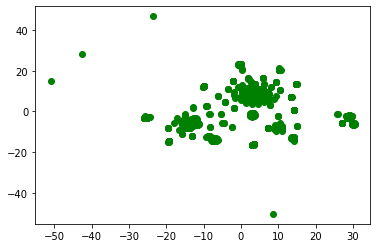

In [72]:
x = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(x, y, c = 'green')
plt.show()

C:\Users\hitst\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


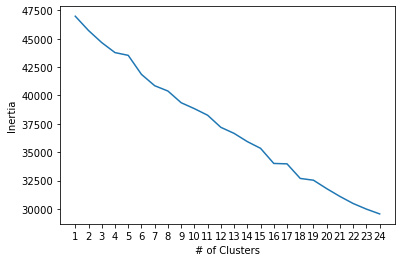

In [62]:
inertia = []
k = list(range(1, 25))

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(pca_crypto_df2)
    inertia.append(km.inertia_)

# Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
elbowcurve_df = pd.DataFrame(elbow_data)
plt.plot(elbowcurve_df['k'], elbowcurve_df['inertia'])
plt.xticks(range(1, 25))
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')
plt.show()

In [64]:
# elbowcurve_df

It is difficult to choose the value of k since there is no clear elbow in this graph. I also plotted the graph with a K range up to 100 and while I saw a elbow around 90, further evaluation is needed to determine the K value and the best number of cluster groups. I would recommend that the cryptocurrencies cannot be clustered together confidently with this current level of insight. 